In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('/content/sample_data/netflix_titles.csv')

In [3]:
df.shape

(8807, 12)

In [4]:
df.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7564,s7565,Movie,National Treasure,Jon Turteltaub,"Nicolas Cage, Diane Kruger, Justin Bartha, Sea...",United States,"June 1, 2018",2004,PG,131 min,"Action & Adventure, Children & Family Movies",Modern treasure hunters search for a chest of ...
1008,s1009,Movie,Motu Patlu VS Robo Kids,Suhas Kadav,"Sourav Chakraborty, Anil Dutt",NaN,"April 20, 2021",2019,TV-Y,84 min,Children & Family Movies,"For Motu, facing off against three children be..."
1230,s1231,Movie,Aelay,Halitha Shameem,"P. Samuthirakani, Manikandan, Madhumathi Padma...",India,"March 5, 2021",2021,TV-14,151 min,"Comedies, Dramas, Independent Movies",A son stoically returns to his village upon hi...
8096,s8097,Movie,Stop at Nothing: The Lance Armstrong Story,Alex Holmes,NaN,"Australia, United Kingdom, United States, New ...","February 15, 2015",2014,NR,100 min,"Documentaries, International Movies, Sports Mo...",An athlete dupes the world with his tale of mi...
3491,s3492,TV Show,Glitch,NaN,"Patrick Brammall, Genevieve O'Reilly, Emma Boo...",Australia,"September 25, 2019",2019,TV-MA,3 Seasons,"International TV Shows, TV Dramas, TV Horror",A police officer and a doctor face an emotiona...
1951,s1952,TV Show,A Perfect Crime,NaN,NaN,Germany,"September 25, 2020",2020,TV-14,1 Season,"Crime TV Shows, Docuseries, International TV S...",This docuseries investigates the 1991 killing ...
3049,s3050,TV Show,"Sex, Explained",NaN,Janelle Monáe,United States,"January 2, 2020",2020,TV-MA,1 Season,"Docuseries, Science & Nature TV",From the biology of attraction to the history ...
1465,s1466,TV Show,The Haunted Hathaways,NaN,"Amber Frank, Curtis Harris, Benjamin Flores Jr...",United States,"January 1, 2021",2013,TV-G,2 Seasons,"Kids' TV, TV Comedies, TV Sci-Fi & Fantasy",Single mom Michelle Hathaway and her daughters...
956,s957,Movie,Zack and Miri Make a Porno,Kevin Smith,"Seth Rogen, Elizabeth Banks, Craig Robinson, J...",United States,"May 1, 2021",2008,R,101 min,"Comedies, Independent Movies, Romantic Movies",Zack and Miri make and star in an adult film t...
1152,s1153,TV Show,Rainbow High,NaN,"Tara Sands, Anairis Quiñones, Laura Stahl, Jen...",United States,"March 30, 2021",2020,TV-Y,1 Season,Kids' TV,The popular fashion dolls come to life in this...


In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df['director'].sample(10)

1651                                     Chris Columbus
5189                                   Ali Samadi Ahadi
1337                             Mostofa Sarwar Farooki
3220                                                NaN
6865                                       Takuya Inaba
2919    Takashi Yamazaki, Ryuichi Yagi, Makoto Hanafusa
426                 Ainsley Gardiner, Briar Grace-Smith
1104                                     Vince Marcello
7631                                     Lars von Trier
1613                                     Richard Laxton
Name: director, dtype: object

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
numerical_features = df.select_dtypes(include='number')

In [10]:
numerical_features.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


In [11]:
categorical_features = df.select_dtypes(include='object')
categorical_features.describe().T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


# **DATA CLEANING**

In [12]:
df.isnull().values.any()

True

<Axes: >

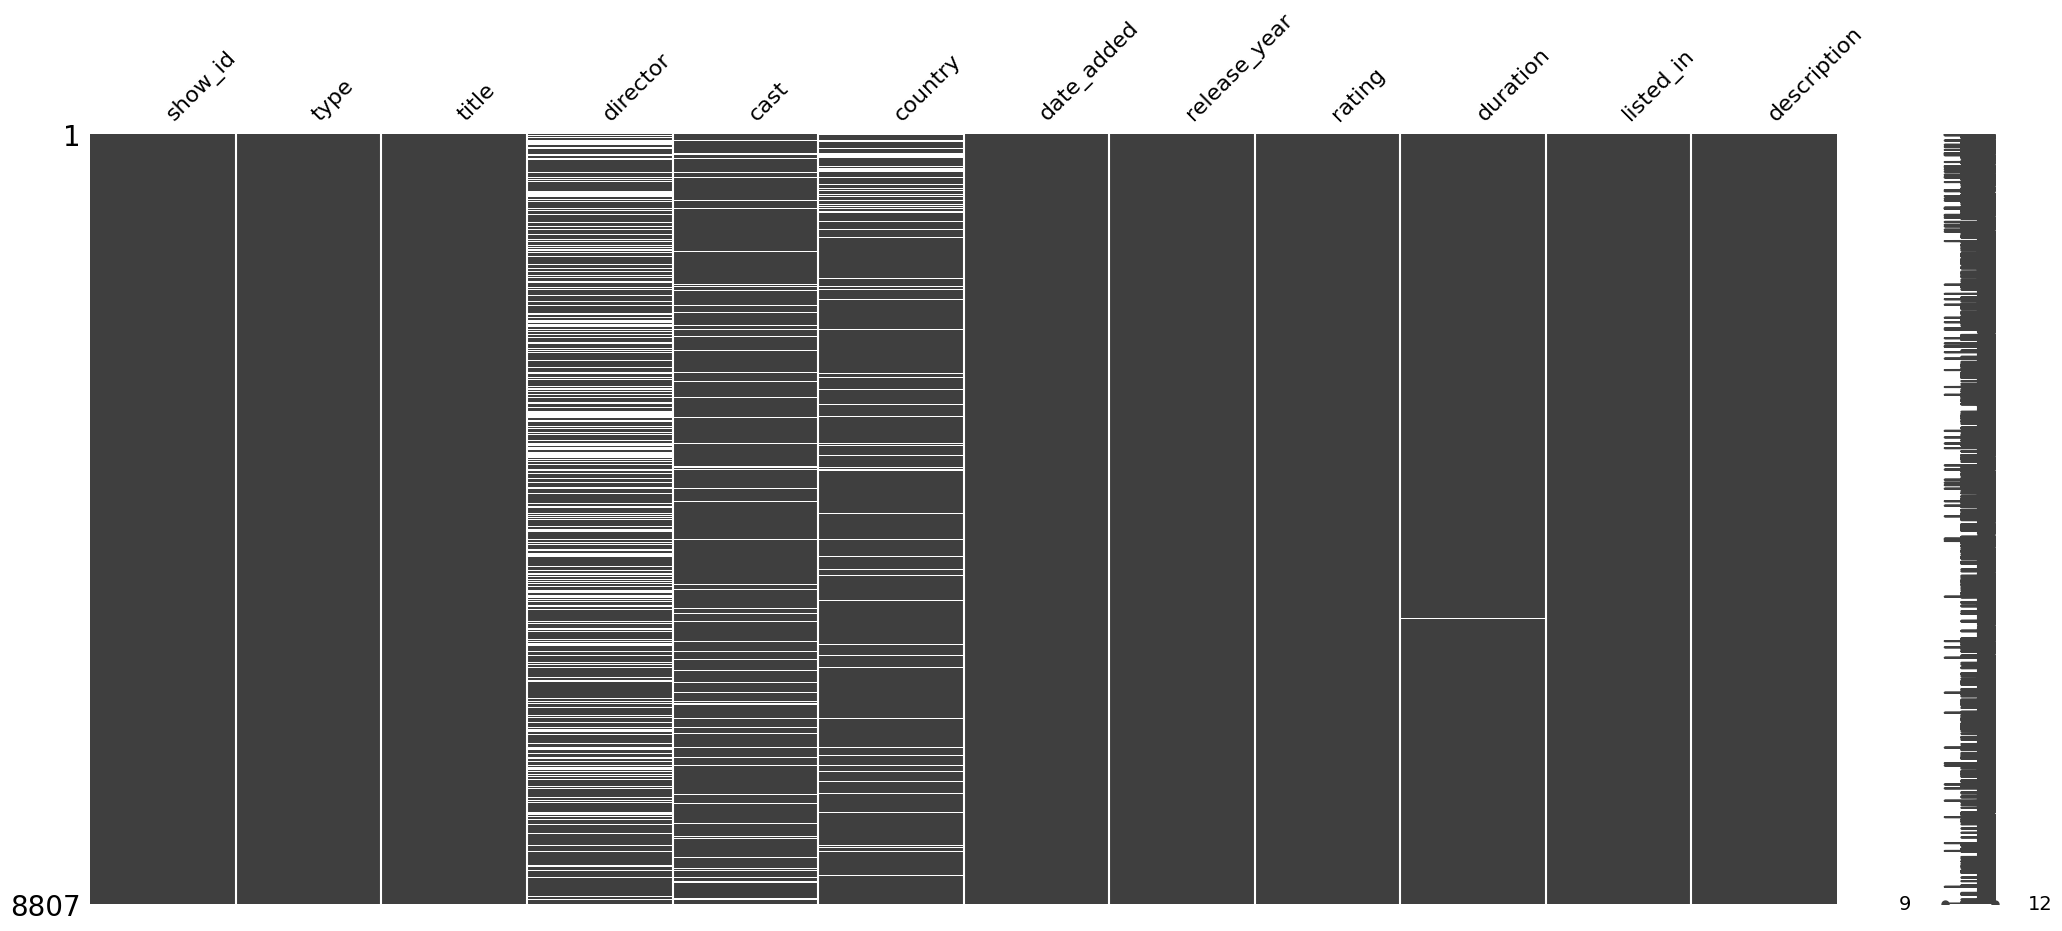

In [15]:
msno.matrix(df)

In [16]:
def missing_value_table(df, get_null_columns=False):

    null_columns = [col for col in df.columns
                    if df[col].isnull().sum() > 0]


    null_counts = df[null_columns].isnull().sum().sort_values(ascending=True)


    null_value_rates = (df[null_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=True)
    formatted_null_value_rates = null_value_rates.apply(lambda value: f"% {str(np.round(value, 2))}")


    null_df = pd.concat([null_counts, formatted_null_value_rates],
                        axis=1, keys=["Null Value Count", "Null Value Rates"])
    print(null_df, end="\n")

    if get_null_columns:
        return null_columns


missing_value_table(df)

            Null Value Count Null Value Rates
duration                   3           % 0.03
rating                     4           % 0.05
date_added                10           % 0.11
cast                     825           % 9.37
country                  831           % 9.44
director                2634          % 29.91


In [17]:
columns_to_fill = missing_value_table(df, get_null_columns=True)
df[columns_to_fill] = df[columns_to_fill].fillna('missing')

            Null Value Count Null Value Rates
duration                   3           % 0.03
rating                     4           % 0.05
date_added                10           % 0.11
cast                     825           % 9.37
country                  831           % 9.44
director                2634          % 29.91


In [18]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# **2. Checking Dublicate Values**

In [19]:
duplicated_rows = df[df.duplicated()]
print(f"Dublicates value number in dataset: {duplicated_rows.shape[0]}")

Dublicates value number in dataset: 0


# **3. Handling inconsistent or incorrect data**

In [20]:
def plot_categorical_frequency(data, x_label, y_label, title):
    """Show Bar Frequency for categorical Features"""
    frequency_counts = data.value_counts()

    plt.figure(figsize=(10, 6))
    plt.bar(frequency_counts.index, frequency_counts.values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

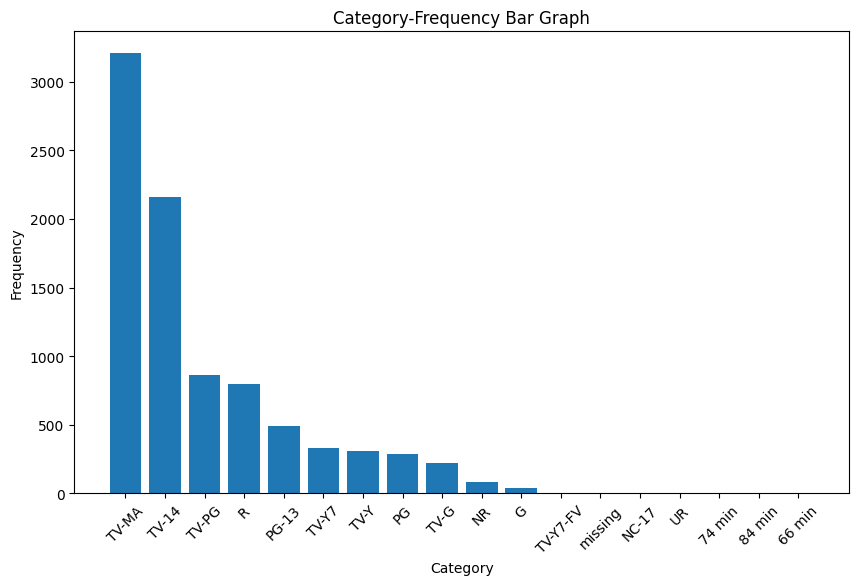

In [21]:
plot_categorical_frequency(df["rating"], "Category", "Frequency", "Category-Frequency Bar Graph")

In [22]:
df['rating'] = np.where(np.isin(df['rating'], ['74 min', '84 min', '66 min', 'missing']), 'UR', df['rating'])

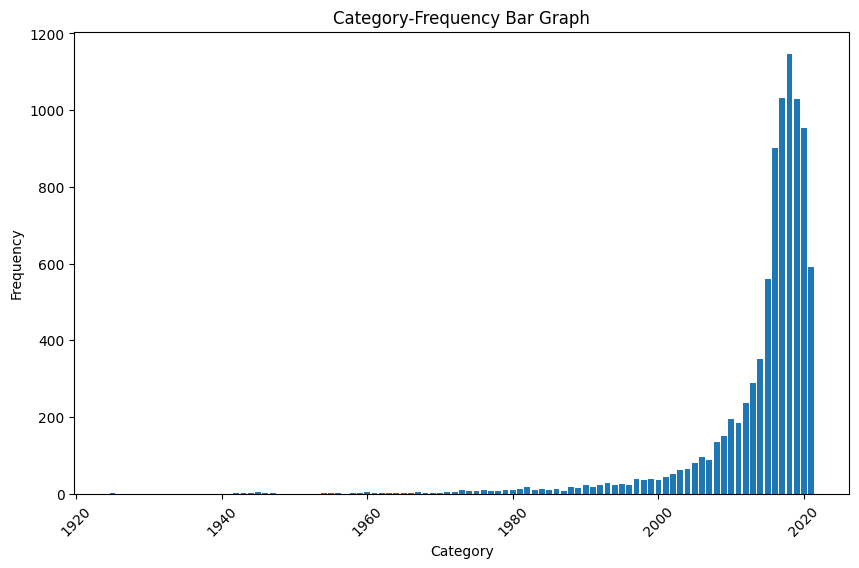

In [23]:
plot_categorical_frequency(df["release_year"], "Category", "Frequency", "Category-Frequency Bar Graph")

# **EDA**

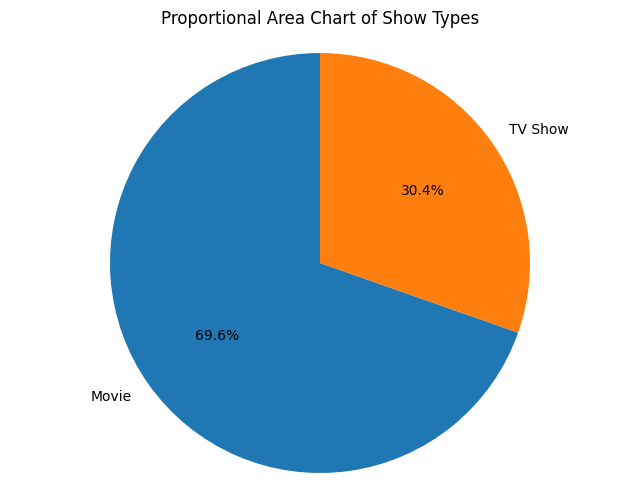

In [24]:
type_counts = df['type'].value_counts()
total_shows = type_counts.sum()

# Calculate proportions
proportions = type_counts / total_shows

# Plotting the proportional area chart
plt.figure(figsize=(8, 6))
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proportional Area Chart of Show Types')
plt.show()

In [25]:
# Count the occurrences of each year
year_counts = df['release_year'].value_counts().sort_index()

# Create a stacked area graph using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=year_counts.index,
    y=year_counts.values,
    mode='none',
    fill='tozeroy',
    hovertemplate='Year: %{x}<br>Count: %{y}<extra></extra>',
    name='Count'
))

# Customize the axes labels and title
fig.update_layout(
    xaxis=dict(title='Year'),
    yaxis=dict(title='Count'),
    title='Distribution of Content by Release Year'
)

# Show the stacked area graph
fig.show()

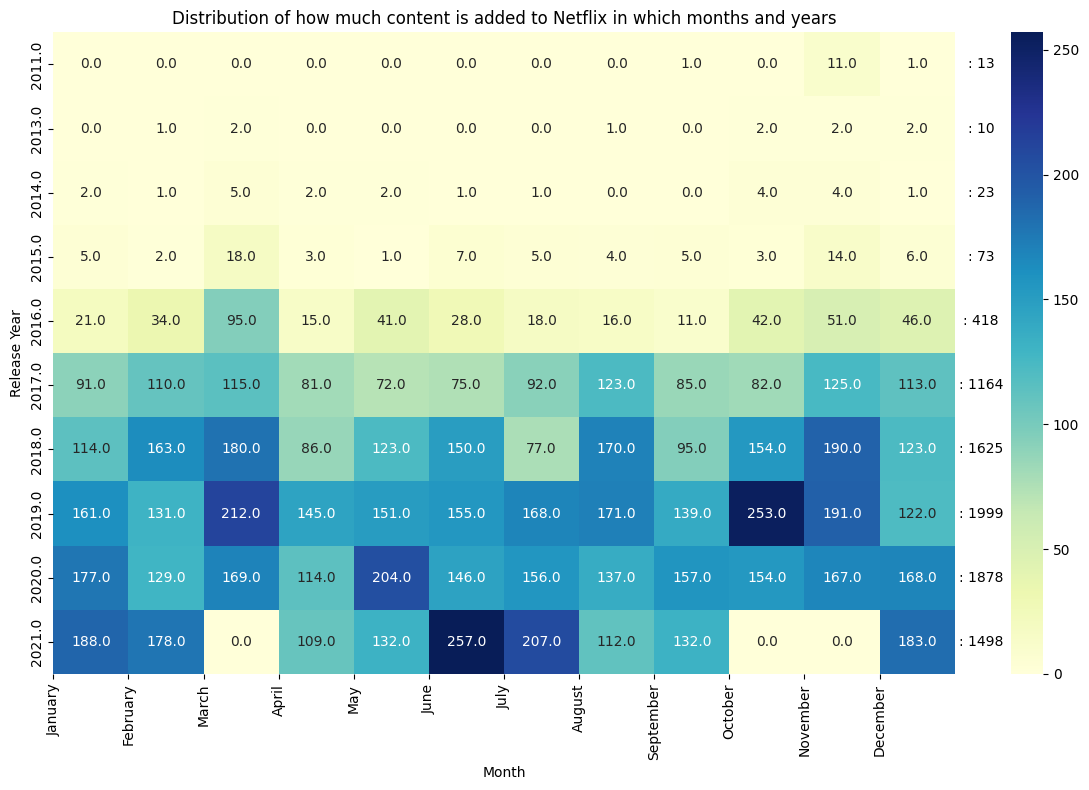

In [26]:
from datetime import datetime

# Helper function to parse date with varying formats
def parse_date(date_string):
    formats = ["%B %d, %Y", "%B %Y", "%Y"]
    for fmt in formats:
        try:
            return datetime.strptime(date_string, fmt).date()
        except ValueError:
            pass
    return None

# Filter out rows with 'missing' in the 'date_added' column
filtered_df = df[df['date_added'] != 'missing'].copy()

filtered_df['release_date'] = filtered_df['date_added'].apply(parse_date)
filtered_df['release_date'] = pd.to_datetime(filtered_df['release_date'])

filtered_df['release_day'] = filtered_df['release_date'].dt.day
filtered_df['release_month'] = filtered_df['release_date'].dt.month_name()
filtered_df['release_year'] = filtered_df['release_date'].dt.year

# Count the occurrences of each release year
year_counts = filtered_df['release_year'].value_counts()

# Select the years with the most movies
top_years = year_counts.head(10).index

# Filter the data for the selected years
filtered_df = filtered_df[filtered_df['release_year'].isin(top_years)].copy()

# Count the occurrences of each release year and month combination
release_counts = filtered_df.groupby(['release_year', 'release_month']).size().unstack().fillna(0)

# Create a heatmap plot
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(release_counts, cmap='YlGnBu', annot=True, fmt=".1f")

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Release Year')
plt.title('Distribution of how much content is added to Netflix in which months and years')

# Customize x-axis tick labels to show month names
month_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
                'August', 'September', 'October', 'November', 'December']
plt.xticks(ticks=range(0, 12), labels=month_labels)

# Add total count annotations for each year below the bars
for i, year in enumerate(release_counts.index):
    plt.text(12.35, i + 0.5, f': {year_counts.loc[year]}', ha='center', va='center')

# Display the plot
plt.tight_layout()
plt.show()

<ipython-input-27-7e69ae50de6a>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




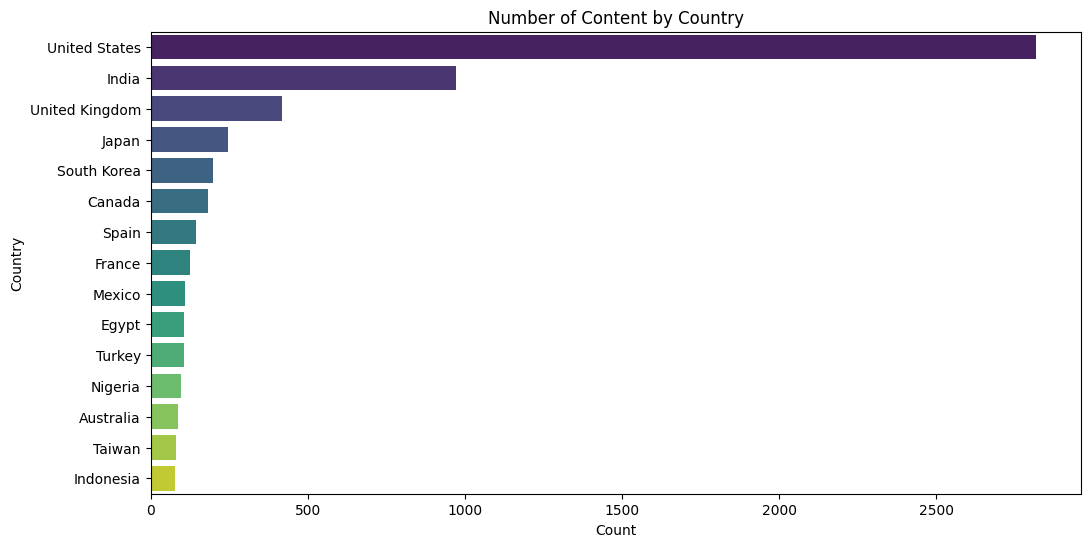

In [27]:
# Filter out rows with 'missing' in the 'country' column
filtered_df = df[df['country'] != 'missing'].copy()

# Count the occurrences of each country
country_counts = filtered_df['country'].value_counts()

# Select the top 10 countries with the most content
top_countries = country_counts.head(15)

# Create a bar plot
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Number of Content by Country')

# Display the plot
plt.show()

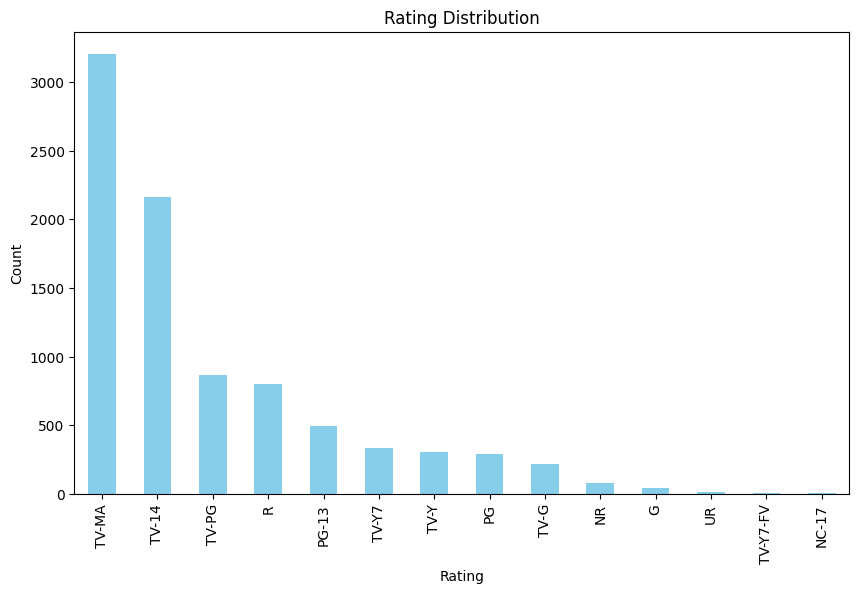

In [28]:
# Filter out rows with 'missing' in the 'rating' column
filtered_df = df[df['rating'] != 'missing'].copy()

# Count the occurrences of each rating
rating_counts = filtered_df['rating'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')

# Display the plot
plt.show()

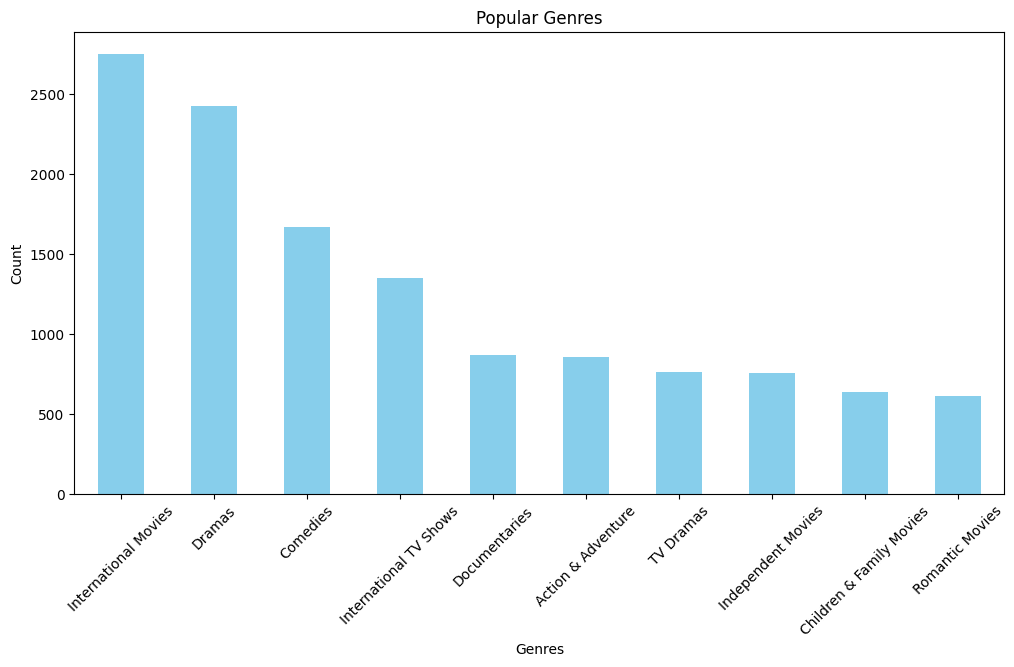

In [29]:
# Extract the genres
genres = df['listed_in'].str.split(', ').explode()

# Count the occurrences of each genre
genre_counts = genres.value_counts()

# Select the top 10 popular genres
top_genres = genre_counts.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
top_genres.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Popular Genres')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()

Duration Summary Statistics:
Minimum duration: 3 min
Maximum duration: 312 min
Mean duration: 99.58 min
Median duration: 98.00 min


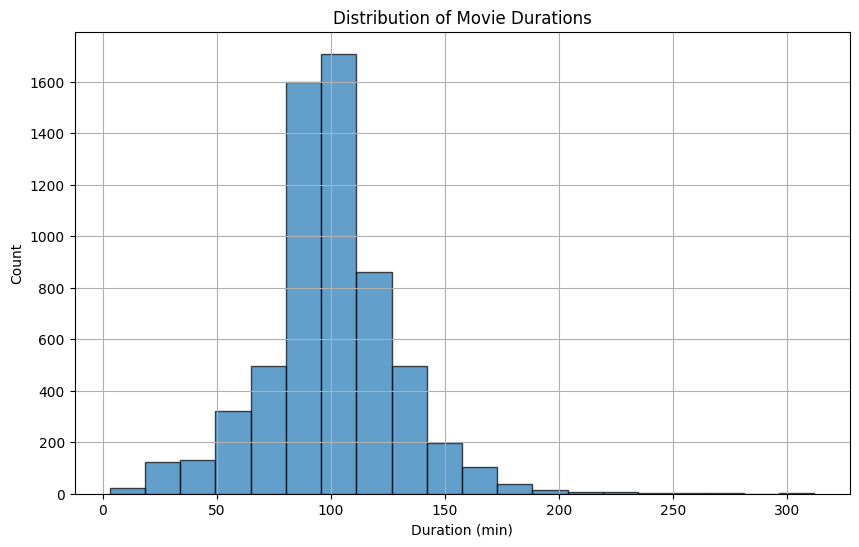

In [30]:
# Extract the movie durations without 'missing' values
movie_durations = df[(df['type'] == 'Movie') & (df['duration'] != 'missing')]['duration']

# Convert the durations to numeric values (remove 'min' suffix)
movie_durations = movie_durations.str.replace(' min', '').astype(int)

# Calculate summary statistics
min_duration = movie_durations.min()
max_duration = movie_durations.max()
mean_duration = movie_durations.mean()
median_duration = movie_durations.median()

# Print the summary statistics
print("Duration Summary Statistics:")
print("Minimum duration: {} min".format(min_duration))
print("Maximum duration: {} min".format(max_duration))
print("Mean duration: {:.2f} min".format(mean_duration))
print("Median duration: {:.2f} min".format(median_duration))

# Create a histogram of movie durations
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(movie_durations, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Duration (min)')
plt.ylabel('Count')
plt.title('Distribution of Movie Durations')
plt.grid(True)
plt.show()

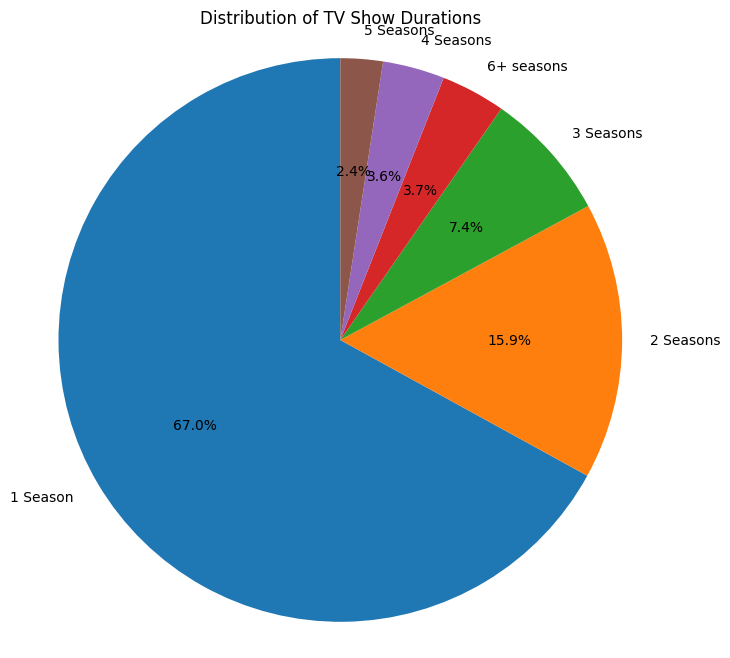

In [31]:
# Filter TV show durations without 'missing' values
tv_show_durations = df[(df['type'] == 'TV Show') & (df['duration'] != 'missing')]['duration']

# Combine durations after 6 seasons into a single category
tv_show_durations = tv_show_durations.apply(lambda x: '6+ seasons' if int(x.split(' ')[0]) >= 6 else x)

# Count the occurrences of each duration
duration_counts = tv_show_durations.value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(duration_counts, labels=duration_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of TV Show Durations')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()

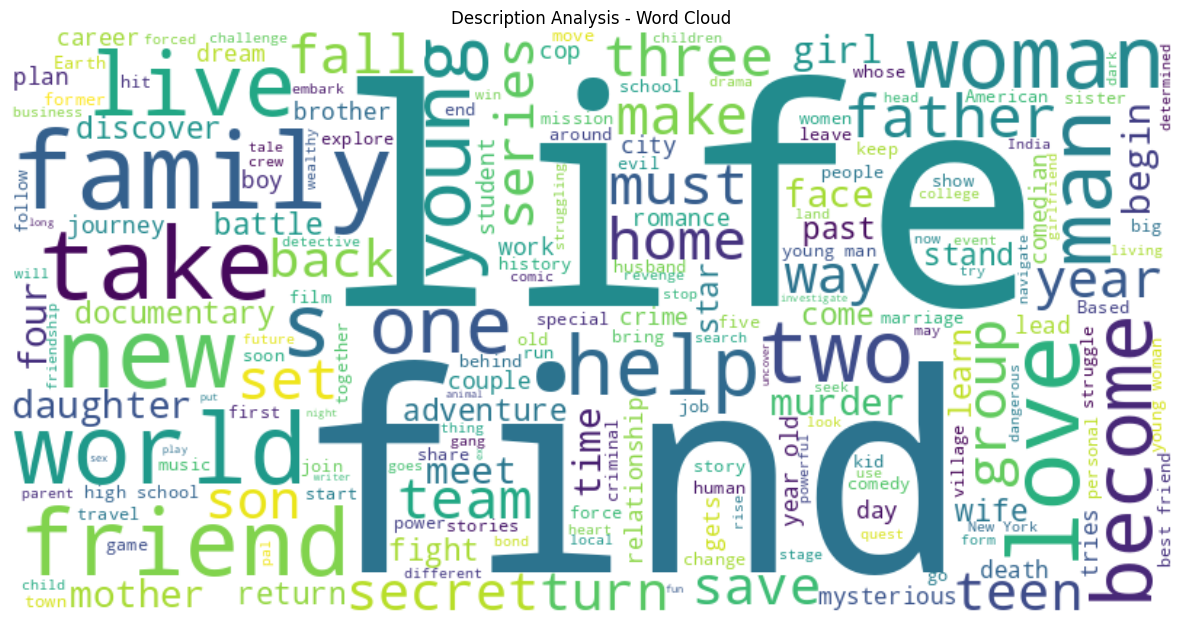

In [32]:
# Filter out missing description values
description_data = df[df['description'] != 'missing']['description']

# Join all the cast names into a single string
description_text = ' '.join(description_data)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(description_text)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 10))

# Display the word cloud
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_title('Description Analysis - Word Cloud')
ax.axis('off')

# Show the plot
plt.show()